# Investigating the Impact of Startup Investment Patterns on Company Growth 
## Introduction

The 21st century has seen a rapid increase in the number of startups, fueled by new technology, globalization, and a shift towards innovation driven economies. Venture capital, a niche within private equity, has similarly seen rapid growth as it plays a crucial role in the funding of these startups.

Analyzing variables in a Kaggle dataset, sourced from Crunchbase (2013), we can gain insights into the relationship between startup investments and company growth. This information can help entrepreneurs make more prudent decisions about raising capital, and help investors identify the best investment opportunities.

**Data**

The data for this investigation is downloaded from a Kaggle notebook in the following url:

https://www.kaggle.com/datasets/justinas/startup-investments/data

This dataset contains comprehensive information about the startup ecosystem: companies, individuals, relationships, funding rounds, acquisitions, IPOs, and more.

**Key Variables**

The Y variable (outcome) in this analysis will be total funding. This was chosen as a crude measure of company growth, but of course this will not tell the full story; especially given most of these companies are in their early stages. In future projects, external datasets of quarterly financials, userbase growth, and more can provide better assessments of company growth. The chosen X variables (explanatory or independent) are market category, company region, country, and first date of funding. These variables were chosen as the strongest candidates for investment patterns in the startup ecosystem because company sector, region, country, and time of funding can all be heavily influential factors in the financial matters for early stage growth companies: known for gratituous roll outs, "move fast and break things".

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning/Loading

In [3]:
objects = pd.read_csv('startup/objects.csv', low_memory=False)
pd.pandas.set_option('display.max_columns', None)
objects.head()

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,logo_url,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,http://s3.amazonaws.com/crunchbase_prod_assets...,401,54,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,186,85,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,107,34,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaN,NaN,0,0,NaN,NaN,0,0.0,2003-02-01,2011-09-23,4,12,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,NaN,0,0,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,200,74,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18


In [4]:
objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462651 entries, 0 to 462650
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   462651 non-null  object 
 1   entity_type          462651 non-null  object 
 2   entity_id            462651 non-null  int64  
 3   parent_id            27715 non-null   object 
 4   name                 462647 non-null  object 
 5   normalized_name      462620 non-null  object 
 6   permalink            462651 non-null  object 
 7   category_code        123186 non-null  object 
 8   status               462651 non-null  object 
 9   founded_at           100441 non-null  object 
 10  closed_at            2809 non-null    object 
 11  domain               174942 non-null  object 
 12  homepage_url         174942 non-null  object 
 13  twitter_username     126089 non-null  object 
 14  logo_url             208850 non-null  object 
 15  logo_width       

In [5]:
objects.drop(['updated_at', 'created_at', 'created_by', 'overview', 'description', 'short_description', 'logo_height', 'logo_width', 'logo_url', 'twitter_username', 'homepage_url', 'domain', 'permalink', 'tag_list'], axis='columns', inplace=True)
objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462651 entries, 0 to 462650
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   462651 non-null  object 
 1   entity_type          462651 non-null  object 
 2   entity_id            462651 non-null  int64  
 3   parent_id            27715 non-null   object 
 4   name                 462647 non-null  object 
 5   normalized_name      462620 non-null  object 
 6   category_code        123186 non-null  object 
 7   status               462651 non-null  object 
 8   founded_at           100441 non-null  object 
 9   closed_at            2809 non-null    object 
 10  country_code         95043 non-null   object 
 11  state_code           54760 non-null   object 
 12  city                 90684 non-null   object 
 13  region               462651 non-null  object 
 14  first_investment_at  16956 non-null   object 
 15  last_investment_a

In [6]:
objects.rename(columns={'id':'funded_object_id'}, inplace=True)
objects.head()

,funded_object_id,entity_type,entity_id,parent_id,name,normalized_name,category_code,status,founded_at,closed_at,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships
0,c:1,Company,1,NaN,Wetpaint,wetpaint,web,operating,2005-10-17,NaN,USA,WA,Seattle,Seattle,NaN,NaN,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17
1,c:10,Company,10,NaN,Flektor,flektor,games_video,acquired,NaN,NaN,USA,CA,Culver City,Los Angeles,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,6
2,c:100,Company,100,NaN,There,there,games_video,acquired,NaN,NaN,USA,CA,San Mateo,SF Bay,NaN,NaN,0,0,NaN,NaN,0,0.0,2003-02-01,2011-09-23,4,12
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,unknown,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,unknown,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0


In [7]:
investments = pd.read_csv('startup/investments.csv', low_memory=False)
investments.head()

,id,funding_round_id,funded_object_id,investor_object_id,created_at,updated_at
0,1,1,c:4,f:1,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,1,c:4,f:2,2007-07-04 04:52:57,2008-02-27 23:14:29
2,3,3,c:5,f:4,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,f:1,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,4,c:5,f:5,2007-05-27 06:09:36,2013-06-28 20:07:24


In [8]:
investments.drop(['created_at', 'updated_at'], axis='columns', inplace=True)
investments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80902 entries, 0 to 80901
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  80902 non-null  int64 
 1   funding_round_id    80902 non-null  int64 
 2   funded_object_id    80902 non-null  object
 3   investor_object_id  80902 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.5+ MB


In [9]:
df = investments.merge(objects, on='funded_object_id')
df.head()

,id,funding_round_id,funded_object_id,investor_object_id,entity_type,entity_id,parent_id,name,normalized_name,category_code,status,founded_at,closed_at,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships
0,1,1,c:4,f:1,Company,4,NaN,Digg,digg,news,acquired,2004-10-11,NaN,USA,CA,San Francisco,SF Bay,NaN,NaN,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,57
1,2,1,c:4,f:2,Company,4,NaN,Digg,digg,news,acquired,2004-10-11,NaN,USA,CA,San Francisco,SF Bay,NaN,NaN,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,57
2,144,85,c:4,f:1,Company,4,NaN,Digg,digg,news,acquired,2004-10-11,NaN,USA,CA,San Francisco,SF Bay,NaN,NaN,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,57
3,145,85,c:4,f:2,Company,4,NaN,Digg,digg,news,acquired,2004-10-11,NaN,USA,CA,San Francisco,SF Bay,NaN,NaN,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,57
4,146,85,c:4,f:4850,Company,4,NaN,Digg,digg,news,acquired,2004-10-11,NaN,USA,CA,San Francisco,SF Bay,NaN,NaN,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,57


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80570 entries, 0 to 80569
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   80570 non-null  int64  
 1   funding_round_id     80570 non-null  int64  
 2   funded_object_id     80570 non-null  object 
 3   investor_object_id   80570 non-null  object 
 4   entity_type          80570 non-null  object 
 5   entity_id            80570 non-null  int64  
 6   parent_id            0 non-null      object 
 7   name                 80570 non-null  object 
 8   normalized_name      80570 non-null  object 
 9   category_code        78704 non-null  object 
 10  status               80570 non-null  object 
 11  founded_at           68590 non-null  object 
 12  closed_at            4014 non-null   object 
 13  country_code         77875 non-null  object 
 14  state_code           57257 non-null  object 
 15  city                 76044 non-null 

In [11]:
fund_rounds = pd.read_csv('startup/funding_rounds.csv', low_memory=False)
fund_rounds.head()

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,pre_money_valuation,pre_money_currency_code,post_money_valuation_usd,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,0.0,USD,0.0,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,115000000.0,USD,0.0,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,2006-04-01,series-b,b,27500000.0,27500000.0,USD,525000000.0,525000000.0,USD,0.0,0.0,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,10500000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12


In [12]:
fund_rounds.drop(['id', 'funding_round_id', 'funding_round_code', 'source_url', 'source_description', 'created_by', 'created_at', 'updated_at', 'pre_money_valuation', 'pre_money_currency_code', 'post_money_valuation', 'post_money_currency_code', 'raised_amount', 'raised_currency_code'], axis='columns', inplace=True)
fund_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52928 entries, 0 to 52927
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   object_id                 52928 non-null  object 
 1   funded_at                 52680 non-null  object 
 2   funding_round_type        52928 non-null  object 
 3   raised_amount_usd         52928 non-null  float64
 4   pre_money_valuation_usd   52928 non-null  float64
 5   post_money_valuation_usd  52928 non-null  float64
 6   participants              52928 non-null  int64  
 7   is_first_round            52928 non-null  int64  
 8   is_last_round             52928 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 3.6+ MB


In [13]:
fund_rounds.rename(columns={'object_id':'funded_object_id'}, inplace=True)
df2 = df.merge(fund_rounds, on='funded_object_id')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223898 entries, 0 to 223897
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        223898 non-null  int64  
 1   funding_round_id          223898 non-null  int64  
 2   funded_object_id          223898 non-null  object 
 3   investor_object_id        223898 non-null  object 
 4   entity_type               223898 non-null  object 
 5   entity_id                 223898 non-null  int64  
 6   parent_id                 0 non-null       object 
 7   name                      223898 non-null  object 
 8   normalized_name           223898 non-null  object 
 9   category_code             221193 non-null  object 
 10  status                    223898 non-null  object 
 11  founded_at                202601 non-null  object 
 12  closed_at                 8438 non-null    object 
 13  country_code              220161 non-null  o

In [14]:
df2.drop('parent_id', axis='columns', inplace=True)
df2.head()

,id,funding_round_id,funded_object_id,investor_object_id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,closed_at,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,funded_at,funding_round_type,raised_amount_usd,pre_money_valuation_usd,post_money_valuation_usd,participants,is_first_round,is_last_round
0,1,1,c:4,f:1,Company,4,Digg,digg,news,acquired,2004-10-11,NaN,USA,CA,San Francisco,SF Bay,NaN,NaN,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,57,2006-12-01,series-b,8500000.0,0.0,0.0,2,0,0
1,1,1,c:4,f:1,Company,4,Digg,digg,news,acquired,2004-10-11,NaN,USA,CA,San Francisco,SF Bay,NaN,NaN,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,57,2005-10-01,series-a,2800000.0,0.0,0.0,8,0,1
2,1,1,c:4,f:1,Company,4,Digg,digg,news,acquired,2004-10-11,NaN,USA,CA,San Francisco,SF Bay,NaN,NaN,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,57,2008-09-24,series-c+,28700000.0,0.0,0.0,4,0,0
3,1,1,c:4,f:1,Company,4,Digg,digg,news,acquired,2004-10-11,NaN,USA,CA,San Francisco,SF Bay,NaN,NaN,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,57,2011-07-12,series-c+,5000000.0,0.0,0.0,0,1,0
4,2,1,c:4,f:2,Company,4,Digg,digg,news,acquired,2004-10-11,NaN,USA,CA,San Francisco,SF Bay,NaN,NaN,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,57,2006-12-01,series-b,8500000.0,0.0,0.0,2,0,0


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223898 entries, 0 to 223897
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        223898 non-null  int64  
 1   funding_round_id          223898 non-null  int64  
 2   funded_object_id          223898 non-null  object 
 3   investor_object_id        223898 non-null  object 
 4   entity_type               223898 non-null  object 
 5   entity_id                 223898 non-null  int64  
 6   name                      223898 non-null  object 
 7   normalized_name           223898 non-null  object 
 8   category_code             221193 non-null  object 
 9   status                    223898 non-null  object 
 10  founded_at                202601 non-null  object 
 11  closed_at                 8438 non-null    object 
 12  country_code              220161 non-null  object 
 13  state_code                176887 non-null  o

In [16]:
df2.isna().sum()

id                               0
funding_round_id                 0
funded_object_id                 0
investor_object_id               0
entity_type                      0
entity_id                        0
name                             0
normalized_name                  0
category_code                 2705
status                           0
founded_at                   21297
closed_at                   215460
country_code                  3737
state_code                   47011
city                          7181
region                           0
first_investment_at         220713
last_investment_at          220713
investment_rounds                0
invested_companies               0
first_funding_at                87
last_funding_at                 87
funding_rounds                   0
funding_total_usd                0
first_milestone_at           41500
last_milestone_at            41500
milestones                       0
relationships                    0
funded_at           

In [17]:
round(100*(df2.isnull().sum()/len(df2.index)), 2)

id                           0.00
funding_round_id             0.00
funded_object_id             0.00
investor_object_id           0.00
entity_type                  0.00
entity_id                    0.00
name                         0.00
normalized_name              0.00
category_code                1.21
status                       0.00
founded_at                   9.51
closed_at                   96.23
country_code                 1.67
state_code                  21.00
city                         3.21
region                       0.00
first_investment_at         98.58
last_investment_at          98.58
investment_rounds            0.00
invested_companies           0.00
first_funding_at             0.04
last_funding_at              0.04
funding_rounds               0.00
funding_total_usd            0.00
first_milestone_at          18.54
last_milestone_at           18.54
milestones                   0.00
relationships                0.00
funded_at                    0.10
funding_round_

In [18]:
df2.drop(['closed_at', 'first_investment_at', 'last_investment_at'], axis='columns', inplace=True)
round(100*(df2.isnull().sum()/len(df2.index)), 2)

id                           0.00
funding_round_id             0.00
funded_object_id             0.00
investor_object_id           0.00
entity_type                  0.00
entity_id                    0.00
name                         0.00
normalized_name              0.00
category_code                1.21
status                       0.00
founded_at                   9.51
country_code                 1.67
state_code                  21.00
city                         3.21
region                       0.00
investment_rounds            0.00
invested_companies           0.00
first_funding_at             0.04
last_funding_at              0.04
funding_rounds               0.00
funding_total_usd            0.00
first_milestone_at          18.54
last_milestone_at           18.54
milestones                   0.00
relationships                0.00
funded_at                    0.10
funding_round_type           0.00
raised_amount_usd            0.00
pre_money_valuation_usd      0.00
post_money_val

In [19]:
df2 = df2.dropna(subset=['founded_at','state_code','first_milestone_at','last_milestone_at'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143847 entries, 0 to 223893
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        143847 non-null  int64  
 1   funding_round_id          143847 non-null  int64  
 2   funded_object_id          143847 non-null  object 
 3   investor_object_id        143847 non-null  object 
 4   entity_type               143847 non-null  object 
 5   entity_id                 143847 non-null  int64  
 6   name                      143847 non-null  object 
 7   normalized_name           143847 non-null  object 
 8   category_code             143470 non-null  object 
 9   status                    143847 non-null  object 
 10  founded_at                143847 non-null  object 
 11  country_code              143847 non-null  object 
 12  state_code                143847 non-null  object 
 13  city                      143389 non-null  object

In [21]:
round(100*(df2.isnull().sum()/len(df2.index)), 2)

id                          0.00
funding_round_id            0.00
funded_object_id            0.00
investor_object_id          0.00
entity_type                 0.00
entity_id                   0.00
name                        0.00
normalized_name             0.00
category_code               0.26
status                      0.00
founded_at                  0.00
country_code                0.00
state_code                  0.00
city                        0.32
region                      0.00
investment_rounds           0.00
invested_companies          0.00
first_funding_at            0.01
last_funding_at             0.01
funding_rounds              0.00
funding_total_usd           0.00
first_milestone_at          0.00
last_milestone_at           0.00
milestones                  0.00
relationships               0.00
funded_at                   0.05
funding_round_type          0.00
raised_amount_usd           0.00
pre_money_valuation_usd     0.00
post_money_valuation_usd    0.00
participan

In [22]:
df2.head()

,id,funding_round_id,funded_object_id,investor_object_id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,country_code,state_code,city,region,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,funded_at,funding_round_type,raised_amount_usd,pre_money_valuation_usd,post_money_valuation_usd,participants,is_first_round,is_last_round
0,1,1,c:4,f:1,Company,4,Digg,digg,news,acquired,2004-10-11,USA,CA,San Francisco,SF Bay,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,57,2006-12-01,series-b,8500000.0,0.0,0.0,2,0,0
1,1,1,c:4,f:1,Company,4,Digg,digg,news,acquired,2004-10-11,USA,CA,San Francisco,SF Bay,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,57,2005-10-01,series-a,2800000.0,0.0,0.0,8,0,1
2,1,1,c:4,f:1,Company,4,Digg,digg,news,acquired,2004-10-11,USA,CA,San Francisco,SF Bay,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,57,2008-09-24,series-c+,28700000.0,0.0,0.0,4,0,0
3,1,1,c:4,f:1,Company,4,Digg,digg,news,acquired,2004-10-11,USA,CA,San Francisco,SF Bay,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,57,2011-07-12,series-c+,5000000.0,0.0,0.0,0,1,0
4,2,1,c:4,f:2,Company,4,Digg,digg,news,acquired,2004-10-11,USA,CA,San Francisco,SF Bay,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,57,2006-12-01,series-b,8500000.0,0.0,0.0,2,0,0


In [23]:
df2.tail()

,id,funding_round_id,funded_object_id,investor_object_id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,country_code,state_code,city,region,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,funded_at,funding_round_type,raised_amount_usd,pre_money_valuation_usd,post_money_valuation_usd,participants,is_first_round,is_last_round
223889,80887,57805,c:285592,p:96526,Company,285592,Chippmunk,chippmunk,ecommerce,operating,2013-09-19,USA,CA,Los Angeles,Los Angeles,0,0,2013-12-11,2013-12-11,1,750000.0,2013-09-19,2013-09-19,1,2,2013-12-11,angel,750000.0,0.0,0.0,5,1,1
223890,80888,57805,c:285592,p:54918,Company,285592,Chippmunk,chippmunk,ecommerce,operating,2013-09-19,USA,CA,Los Angeles,Los Angeles,0,0,2013-12-11,2013-12-11,1,750000.0,2013-09-19,2013-09-19,1,2,2013-12-11,angel,750000.0,0.0,0.0,5,1,1
223891,80889,57805,c:285592,p:150436,Company,285592,Chippmunk,chippmunk,ecommerce,operating,2013-09-19,USA,CA,Los Angeles,Los Angeles,0,0,2013-12-11,2013-12-11,1,750000.0,2013-09-19,2013-09-19,1,2,2013-12-11,angel,750000.0,0.0,0.0,5,1,1
223892,80890,57805,c:285592,p:268293,Company,285592,Chippmunk,chippmunk,ecommerce,operating,2013-09-19,USA,CA,Los Angeles,Los Angeles,0,0,2013-12-11,2013-12-11,1,750000.0,2013-09-19,2013-09-19,1,2,2013-12-11,angel,750000.0,0.0,0.0,5,1,1
223893,80891,57805,c:285592,p:189455,Company,285592,Chippmunk,chippmunk,ecommerce,operating,2013-09-19,USA,CA,Los Angeles,Los Angeles,0,0,2013-12-11,2013-12-11,1,750000.0,2013-09-19,2013-09-19,1,2,2013-12-11,angel,750000.0,0.0,0.0,5,1,1


In [26]:
df2.drop(['id', 'investor_object_id'], axis='columns', inplace=True)
# Removing ID and investor_object_id, unnecessary in analysis with dataset option 1

In [27]:
dupes = df2.duplicated()
sum(dupes)

96016

In [28]:
df2 = df2.drop_duplicates()
dupes2 = df2.duplicated()
sum(dupes2)

0

In [117]:
df2.head()
#Drop raised_amount_usd, funding_round_type, funded_at, funding_round_id

,funding_round_id,funded_object_id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,country_code,state_code,city,region,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,funded_at,funding_round_type,raised_amount_usd,pre_money_valuation_usd,post_money_valuation_usd,participants,is_first_round,is_last_round
0,1,c:4,Company,4,Digg,digg,news,acquired,2004-10-11,USA,CA,San Francisco,SF Bay,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,57,2006-12-01,series-b,8500000.0,0.0,0.0,2,0,0
1,1,c:4,Company,4,Digg,digg,news,acquired,2004-10-11,USA,CA,San Francisco,SF Bay,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,57,2005-10-01,series-a,2800000.0,0.0,0.0,8,0,1
2,1,c:4,Company,4,Digg,digg,news,acquired,2004-10-11,USA,CA,San Francisco,SF Bay,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,57,2008-09-24,series-c+,28700000.0,0.0,0.0,4,0,0
3,1,c:4,Company,4,Digg,digg,news,acquired,2004-10-11,USA,CA,San Francisco,SF Bay,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,57,2011-07-12,series-c+,5000000.0,0.0,0.0,0,1,0
8,85,c:4,Company,4,Digg,digg,news,acquired,2004-10-11,USA,CA,San Francisco,SF Bay,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,57,2006-12-01,series-b,8500000.0,0.0,0.0,2,0,0


In [29]:
df2.tail()

,funding_round_id,funded_object_id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,country_code,state_code,city,region,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,funded_at,funding_round_type,raised_amount_usd,pre_money_valuation_usd,post_money_valuation_usd,participants,is_first_round,is_last_round
223861,56979,c:237061,Company,237061,Kedzoh,kedzoh,education,operating,2011-11-03,USA,CA,Palo Alto,SF Bay,0,0,2011-11-03,2013-01-01,4,180000.0,2011-11-03,2011-11-03,1,1,2013-01-01,angel,50000.0,0.0,0.0,1,1,0
223880,57376,c:285134,Company,285134,DZZOM,dzzom,biotech,operating,2013-10-08,USA,MA,Boston,Boston,0,0,2013-11-01,2013-11-01,1,0.0,2013-10-09,2013-10-09,1,2,2013-11-01,angel,0.0,0.0,0.0,1,1,1
223881,57382,c:222915,Company,222915,First Cut Pro,first cut pro,games_video,operating,2012-04-01,USA,TX,Austin,Austin,0,0,2013-04-30,2013-04-30,1,100000.0,2013-01-01,2013-09-10,2,6,2013-04-30,venture,100000.0,0.0,0.0,2,1,1
223887,57691,c:192923,Company,192923,SquareOne,squareone,games_video,operating,2012-11-01,USA,CA,Pasadena,Los Angeles,0,0,2013-08-05,2013-08-05,1,150000.0,2013-11-13,2013-11-13,1,3,2013-08-05,venture,150000.0,0.0,0.0,1,1,1
223889,57805,c:285592,Company,285592,Chippmunk,chippmunk,ecommerce,operating,2013-09-19,USA,CA,Los Angeles,Los Angeles,0,0,2013-12-11,2013-12-11,1,750000.0,2013-09-19,2013-09-19,1,2,2013-12-11,angel,750000.0,0.0,0.0,5,1,1


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47831 entries, 0 to 223889
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   funding_round_id          47831 non-null  int64  
 1   funded_object_id          47831 non-null  object 
 2   entity_type               47831 non-null  object 
 3   entity_id                 47831 non-null  int64  
 4   name                      47831 non-null  object 
 5   normalized_name           47831 non-null  object 
 6   category_code             47684 non-null  object 
 7   status                    47831 non-null  object 
 8   founded_at                47831 non-null  object 
 9   country_code              47831 non-null  object 
 10  state_code                47831 non-null  object 
 11  city                      47674 non-null  object 
 12  region                    47831 non-null  object 
 13  investment_rounds         47831 non-null  int64  
 14  invested_c

### Acquisitions/IPOs Datasets (add on)

In [31]:
acq = pd.read_csv('startup/acquisitions.csv', low_memory=False)
acq.head()

,id,acquisition_id,acquiring_object_id,acquired_object_id,term_code,price_amount,price_currency_code,acquired_at,source_url,source_description,created_at,updated_at
0,1,1,c:11,c:10,NaN,20000000.0,USD,2007-05-30,http://venturebeat.com/2007/05/30/fox-interact...,Fox Interactive confirms purchase of Photobuck...,2007-05-31 22:19:54,2008-05-21 19:23:44
1,2,7,c:59,c:72,cash,60000000.0,USD,2007-07-01,http://www.techcrunch.com/2007/07/02/deal-is-c...,Deal is Confirmed: Google Acquired GrandCentral,2007-07-03 08:14:50,2011-05-06 21:51:05
2,3,8,c:24,c:132,cash,280000000.0,USD,2007-05-01,http://www.techcrunch.com/2007/05/30/cbs-acqui...,CBS Acquires Europeâs Last.fm for $280 million,2007-07-12 04:19:24,2008-05-19 04:48:50
3,4,9,c:59,c:155,cash,100000000.0,USD,2007-06-01,http://techcrunch.com/2007/05/23/100-million-p...,$100 Million Payday For Feedburner  This Deal...,2007-07-13 09:52:59,2012-06-05 03:22:17
4,5,10,c:212,c:215,cash,25000000.0,USD,2007-07-01,http://blog.seattlepi.nwsource.com/venture/arc...,seatlepi.com,2007-07-20 05:29:07,2008-02-25 00:23:47


In [32]:
acq.drop(['id', 'acquisition_id', 'term_code', 'price_currency_code', 'source_url', 'source_description', 'created_at', 'updated_at'], axis='columns', inplace=True)
acq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9562 entries, 0 to 9561
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   acquiring_object_id  9562 non-null   object 
 1   acquired_object_id   9561 non-null   object 
 2   price_amount         9562 non-null   float64
 3   acquired_at          9533 non-null   object 
dtypes: float64(1), object(3)
memory usage: 298.9+ KB


In [33]:
ipos = pd.read_csv('startup/ipos.csv', low_memory=False)
ipos.head()

,id,ipo_id,object_id,valuation_amount,valuation_currency_code,raised_amount,raised_currency_code,public_at,stock_symbol,source_url,source_description,created_at,updated_at
0,1,1,c:1654,0.000000e+00,USD,0.0,USD,1980-12-19,NASDAQ:AAPL,NaN,NaN,2008-02-09 05:17:45,2012-04-12 04:02:59
1,2,2,c:1242,0.000000e+00,USD,0.0,NaN,1986-03-13,NASDAQ:MSFT,NaN,NaN,2008-02-09 05:25:18,2010-12-11 12:39:46
2,3,3,c:342,0.000000e+00,USD,0.0,NaN,1969-06-09,NYSE:DIS,NaN,NaN,2008-02-09 05:40:32,2010-12-23 08:58:16
3,4,4,c:59,0.000000e+00,USD,0.0,NaN,2004-08-25,NASDAQ:GOOG,NaN,NaN,2008-02-10 22:51:24,2011-08-01 20:47:08
4,5,5,c:317,1.000000e+11,USD,0.0,NaN,1997-05-01,NASDAQ:AMZN,NaN,NaN,2008-02-10 23:28:09,2011-08-01 21:11:22


In [34]:
ipos.drop(['id', 'ipo_id', 'raised_currency_code', 'valuation_currency_code', 'source_url', 'source_description', 'created_at', 'updated_at', 'stock_symbol'], axis='columns', inplace=True)
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   object_id         1254 non-null   object 
 1   valuation_amount  1259 non-null   float64
 2   raised_amount     1259 non-null   float64
 3   public_at         659 non-null    object 
dtypes: float64(2), object(2)
memory usage: 39.5+ KB


### People/Degree/Relationships Datasets (add on)

In [35]:
degrees = pd.read_csv('startup/degrees.csv', low_memory=False)
degrees.head()

,id,object_id,degree_type,subject,institution,graduated_at,created_at,updated_at
0,1,p:6117,MBA,NaN,NaN,NaN,2008-02-19 03:17:36,2008-02-19 03:17:36
1,2,p:6136,BA,"English, French","Washington University, St. Louis",1990-01-01,2008-02-19 17:58:31,2008-02-25 00:23:55
2,3,p:6136,MS,Mass Communication,Boston University,1992-01-01,2008-02-19 17:58:31,2008-02-25 00:23:55
3,4,p:6005,MS,Internet Technology,University of Greenwich,2006-01-01,2008-02-19 23:40:40,2008-02-25 00:23:55
4,5,p:5832,BCS,"Computer Science, Psychology",Rice University,NaN,2008-02-20 05:28:09,2008-02-20 05:28:09


In [36]:
degrees.drop(['id', 'created_at', 'updated_at'], axis='columns', inplace=True)
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   object_id     109610 non-null  object
 1   degree_type   98389 non-null   object
 2   subject       81298 non-null   object
 3   institution   109555 non-null  object
 4   graduated_at  58054 non-null   object
dtypes: object(5)
memory usage: 4.2+ MB


In [37]:
people = pd.read_csv('startup/people.csv', low_memory=False)
people.head()

,id,object_id,first_name,last_name,birthplace,affiliation_name
0,1,p:2,Ben,Elowitz,NaN,Blue Nile
1,2,p:3,Kevin,Flaherty,NaN,Wetpaint
2,3,p:4,Raju,Vegesna,NaN,Zoho
3,4,p:5,Ian,Wenig,NaN,Zoho
4,5,p:6,Kevin,Rose,"Redding, CA",i/o Ventures


In [38]:
people.drop(['id', 'birthplace'], axis='columns', inplace=True)
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   object_id         226709 non-null  object
 1   first_name        226700 non-null  object
 2   last_name         226705 non-null  object
 3   affiliation_name  226684 non-null  object
dtypes: object(4)
memory usage: 6.9+ MB


In [39]:
p_df = people.merge(degrees, on='object_id')
p_df.head()

,object_id,first_name,last_name,affiliation_name,degree_type,subject,institution,graduated_at
0,p:2,Ben,Elowitz,Blue Nile,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",1994-01-01
1,p:2,Ben,Elowitz,Blue Nile,BS,Applied Mathematics,"University of California, Berkeley",1994-01-01
2,p:3,Kevin,Flaherty,Wetpaint,BBA,NaN,Washington University in St Louis,NaN
3,p:3,Kevin,Flaherty,Wetpaint,MBA,NaN,Indiana University,NaN
4,p:5,Ian,Wenig,Zoho,Degree,Advanced Business Professional Course,The Aji Network,2005-01-01


In [40]:
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109056 entries, 0 to 109055
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   object_id         109056 non-null  object
 1   first_name        109056 non-null  object
 2   last_name         109056 non-null  object
 3   affiliation_name  109037 non-null  object
 4   degree_type       97883 non-null   object
 5   subject           80890 non-null   object
 6   institution       109002 non-null  object
 7   graduated_at      57691 non-null   object
dtypes: object(8)
memory usage: 6.7+ MB


In [41]:
relate = pd.read_csv('startup/relationships.csv', low_memory=False)
relate.head()

,id,relationship_id,person_object_id,relationship_object_id,start_at,end_at,is_past,sequence,title,created_at,updated_at
0,1,1,p:2,c:1,NaN,NaN,0,8,Co-Founder/CEO/Board of Directors,2007-05-25 07:03:54,2013-06-03 09:58:46
1,2,2,p:3,c:1,NaN,NaN,1,279242,VP Marketing,2007-05-25 07:04:16,2010-05-21 16:31:34
2,3,3,p:4,c:3,NaN,NaN,0,4,Evangelist,2007-05-25 19:33:03,2013-06-29 13:36:58
3,4,4,p:5,c:3,2006-03-01,2009-12-01,1,4,Senior Director Strategic Alliances,2007-05-25 19:34:53,2013-06-29 10:25:34
4,6,6,p:7,c:4,2005-07-01,2010-04-05,1,1,Chief Executive Officer,2007-05-25 20:05:33,2010-04-05 18:41:41


In [42]:
relate.drop(['id', 'created_at', 'updated_at'], axis='columns', inplace=True)
relate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402878 entries, 0 to 402877
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   relationship_id         402878 non-null  int64 
 1   person_object_id        402878 non-null  object
 2   relationship_object_id  402878 non-null  object
 3   start_at                206995 non-null  object
 4   end_at                  101046 non-null  object
 5   is_past                 402878 non-null  int64 
 6   sequence                402878 non-null  int64 
 7   title                   389526 non-null  object
dtypes: int64(3), object(5)
memory usage: 24.6+ MB


In [43]:
relate.rename(columns={'person_object_id':'object_id'}, inplace=True)
p_df2 = p_df.merge(relate, on='object_id')
p_df2.head()

,object_id,first_name,last_name,affiliation_name,degree_type,subject,institution,graduated_at,relationship_id,relationship_object_id,start_at,end_at,is_past,sequence,title
0,p:2,Ben,Elowitz,Blue Nile,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",1994-01-01,1,c:1,NaN,NaN,0,8,Co-Founder/CEO/Board of Directors
1,p:2,Ben,Elowitz,Blue Nile,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",1994-01-01,11366,c:4993,NaN,NaN,1,6,Co-founder & VP
2,p:2,Ben,Elowitz,Blue Nile,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",1994-01-01,11367,c:233024,NaN,NaN,1,2,Business Development
3,p:2,Ben,Elowitz,Blue Nile,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",1994-01-01,22537,f:1017,NaN,NaN,0,7,Limited Partner
4,p:2,Ben,Elowitz,Blue Nile,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",1994-01-01,112873,c:18661,NaN,NaN,1,3,Consultant


In [44]:
p_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390918 entries, 0 to 390917
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   object_id               390918 non-null  object
 1   first_name              390918 non-null  object
 2   last_name               390918 non-null  object
 3   affiliation_name        390852 non-null  object
 4   degree_type             359171 non-null  object
 5   subject                 298485 non-null  object
 6   institution             390740 non-null  object
 7   graduated_at            219418 non-null  object
 8   relationship_id         390918 non-null  int64 
 9   relationship_object_id  390918 non-null  object
 10  start_at                230865 non-null  object
 11  end_at                  142700 non-null  object
 12  is_past                 390918 non-null  int64 
 13  sequence                390918 non-null  int64 
 14  title                   381387 non-n

In [45]:
p_df2.isna().sum()

object_id                      0
first_name                     0
last_name                      0
affiliation_name              66
degree_type                31747
subject                    92433
institution                  178
graduated_at              171500
relationship_id                0
relationship_object_id         0
start_at                  160053
end_at                    248218
is_past                        0
sequence                       0
title                       9531
dtype: int64

In [46]:
round(100*(p_df2.isnull().sum()/len(p_df2.index)), 2)

object_id                  0.00
first_name                 0.00
last_name                  0.00
affiliation_name           0.02
degree_type                8.12
subject                   23.65
institution                0.05
graduated_at              43.87
relationship_id            0.00
relationship_object_id     0.00
start_at                  40.94
end_at                    63.50
is_past                    0.00
sequence                   0.00
title                      2.44
dtype: float64

In [47]:
p_df2.drop(['end_at', 'start_at', 'graduated_at'], axis='columns', inplace=True)
round(100*(p_df2.isnull().sum()/len(p_df2.index)), 2)

object_id                  0.00
first_name                 0.00
last_name                  0.00
affiliation_name           0.02
degree_type                8.12
subject                   23.65
institution                0.05
relationship_id            0.00
relationship_object_id     0.00
is_past                    0.00
sequence                   0.00
title                      2.44
dtype: float64

In [48]:
p_df3 = p_df2.dropna(subset=['subject', 'degree_type', 'title'])
p_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277368 entries, 0 to 390913
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   object_id               277368 non-null  object
 1   first_name              277368 non-null  object
 2   last_name               277368 non-null  object
 3   affiliation_name        277321 non-null  object
 4   degree_type             277368 non-null  object
 5   subject                 277368 non-null  object
 6   institution             277245 non-null  object
 7   relationship_id         277368 non-null  int64 
 8   relationship_object_id  277368 non-null  object
 9   is_past                 277368 non-null  int64 
 10  sequence                277368 non-null  int64 
 11  title                   277368 non-null  object
dtypes: int64(3), object(9)
memory usage: 27.5+ MB


In [49]:
round(100*(p_df3.isnull().sum()/len(p_df3.index)), 2)

object_id                 0.00
first_name                0.00
last_name                 0.00
affiliation_name          0.02
degree_type               0.00
subject                   0.00
institution               0.04
relationship_id           0.00
relationship_object_id    0.00
is_past                   0.00
sequence                  0.00
title                     0.00
dtype: float64

In [50]:
p_df3.head()

,object_id,first_name,last_name,affiliation_name,degree_type,subject,institution,relationship_id,relationship_object_id,is_past,sequence,title
0,p:2,Ben,Elowitz,Blue Nile,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",1,c:1,0,8,Co-Founder/CEO/Board of Directors
1,p:2,Ben,Elowitz,Blue Nile,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",11366,c:4993,1,6,Co-founder & VP
2,p:2,Ben,Elowitz,Blue Nile,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",11367,c:233024,1,2,Business Development
3,p:2,Ben,Elowitz,Blue Nile,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",22537,f:1017,0,7,Limited Partner
4,p:2,Ben,Elowitz,Blue Nile,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",112873,c:18661,1,3,Consultant


### Final Dataset Options

In [51]:
# Option 1: objects + investments + fundings rounds
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47831 entries, 0 to 223889
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   funding_round_id          47831 non-null  int64  
 1   funded_object_id          47831 non-null  object 
 2   entity_type               47831 non-null  object 
 3   entity_id                 47831 non-null  int64  
 4   name                      47831 non-null  object 
 5   normalized_name           47831 non-null  object 
 6   category_code             47684 non-null  object 
 7   status                    47831 non-null  object 
 8   founded_at                47831 non-null  object 
 9   country_code              47831 non-null  object 
 10  state_code                47831 non-null  object 
 11  city                      47674 non-null  object 
 12  region                    47831 non-null  object 
 13  investment_rounds         47831 non-null  int64  
 14  invested_c

In [52]:
# Option 2: option 1 + acquisitions
acq.rename(columns={'acquired_object_id':'funded_object_id'}, inplace=True)
df_with_acq = df2.merge(acq, on='funded_object_id')
df_with_acq.info()
# Significantly reduces the dataset so need to consider if its worth it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6583 entries, 0 to 6582
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   funding_round_id          6583 non-null   int64  
 1   funded_object_id          6583 non-null   object 
 2   entity_type               6583 non-null   object 
 3   entity_id                 6583 non-null   int64  
 4   name                      6583 non-null   object 
 5   normalized_name           6583 non-null   object 
 6   category_code             6560 non-null   object 
 7   status                    6583 non-null   object 
 8   founded_at                6583 non-null   object 
 9   country_code              6583 non-null   object 
 10  state_code                6583 non-null   object 
 11  city                      6576 non-null   object 
 12  region                    6583 non-null   object 
 13  investment_rounds         6583 non-null   int64  
 14  invested

In [53]:
# Option 2.1: option 1 + IPOS
ipos.rename(columns={'object_id':'funded_object_id'}, inplace=True)
df_with_ipos = df2.merge(ipos, on='funded_object_id')
df_with_ipos.info()
# Reduces dataset even more than acquisitions as the number of IPOs is limited

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2657 entries, 0 to 2656
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   funding_round_id          2657 non-null   int64  
 1   funded_object_id          2657 non-null   object 
 2   entity_type               2657 non-null   object 
 3   entity_id                 2657 non-null   int64  
 4   name                      2657 non-null   object 
 5   normalized_name           2657 non-null   object 
 6   category_code             2653 non-null   object 
 7   status                    2657 non-null   object 
 8   founded_at                2657 non-null   object 
 9   country_code              2657 non-null   object 
 10  state_code                2657 non-null   object 
 11  city                      2657 non-null   object 
 12  region                    2657 non-null   object 
 13  investment_rounds         2657 non-null   int64  
 14  invested

In [54]:
#Option 2.2: option 1 + IPOs + acquisitions
df_with_ipos_acq = df_with_acq.merge(ipos, on='funded_object_id')
df_with_ipos_acq.info()
# This problem is more magnified with both IPOs and acquisitions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   funding_round_id          145 non-null    int64  
 1   funded_object_id          145 non-null    object 
 2   entity_type               145 non-null    object 
 3   entity_id                 145 non-null    int64  
 4   name                      145 non-null    object 
 5   normalized_name           145 non-null    object 
 6   category_code             145 non-null    object 
 7   status                    145 non-null    object 
 8   founded_at                145 non-null    object 
 9   country_code              145 non-null    object 
 10  state_code                145 non-null    object 
 11  city                      145 non-null    object 
 12  region                    145 non-null    object 
 13  investment_rounds         145 non-null    int64  
 14  invested_c

In [55]:
# Option 3: option 1 + people + relationships + degrees
p_df3.rename(columns={'relationship_object_id':'funded_object_id'}, inplace=True)
df_with_p = df2.merge(p_df3, on='funded_object_id')
df_with_p.info()
# Creates a big dataset since it is profiling all the known employees' backgrounds
# Worth further cleaning the data to only include the relevant positions such as...
# CEO/other executives who are involved in the funding/dealmaking process

/var/folders/3m/lsy624kn18d_nc0sk8swz2900000gn/T/ipykernel_17302/1105160875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_df3.rename(columns={'relationship_object_id':'funded_object_id'}, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577242 entries, 0 to 577241
Data columns (total 42 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   funding_round_id          577242 non-null  int64  
 1   funded_object_id          577242 non-null  object 
 2   entity_type               577242 non-null  object 
 3   entity_id                 577242 non-null  int64  
 4   name                      577242 non-null  object 
 5   normalized_name           577242 non-null  object 
 6   category_code             576286 non-null  object 
 7   status                    577242 non-null  object 
 8   founded_at                577242 non-null  object 
 9   country_code              577242 non-null  object 
 10  state_code                577242 non-null  object 
 11  city                      575693 non-null  object 
 12  region                    577242 non-null  object 
 13  investment_rounds         577242 non-null  i

In [56]:
df_with_p.head()

,funding_round_id,funded_object_id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,country_code,state_code,city,region,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,funded_at,funding_round_type,raised_amount_usd,pre_money_valuation_usd,post_money_valuation_usd,participants,is_first_round,is_last_round,object_id,first_name,last_name,affiliation_name,degree_type,subject,institution,relationship_id,is_past,sequence,title
0,1,c:4,Company,4,Digg,digg,news,acquired,2004-10-11,USA,CA,San Francisco,SF Bay,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,57,2006-12-01,series-b,8500000.0,0.0,0.0,2,0,0,p:8,Owen,Byrne,Digg,BS,Computer Science,Saint Mary's (Canada),7,1,1,Senior Software Engineer
1,1,c:4,Company,4,Digg,digg,news,acquired,2004-10-11,USA,CA,San Francisco,SF Bay,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,57,2006-12-01,series-b,8500000.0,0.0,0.0,2,0,0,p:8,Owen,Byrne,Digg,MBA,Business,Dalhousie (Canada),7,1,1,Senior Software Engineer
2,1,c:4,Company,4,Digg,digg,news,acquired,2004-10-11,USA,CA,San Francisco,SF Bay,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,57,2006-12-01,series-b,8500000.0,0.0,0.0,2,0,0,p:1129,David,Sze,LinkedIn,BA,Economics and Political Science,Yale University,69712,1,2,Board of Directors
3,1,c:4,Company,4,Digg,digg,news,acquired,2004-10-11,USA,CA,San Francisco,SF Bay,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,57,2006-12-01,series-b,8500000.0,0.0,0.0,2,0,0,p:9154,John,Quinn,SquareTrade,MS,Information Technology,University of Strathclyde,84677,1,3,VP Engineering
4,1,c:4,Company,4,Digg,digg,news,acquired,2004-10-11,USA,CA,San Francisco,SF Bay,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,57,2006-12-01,series-b,8500000.0,0.0,0.0,2,0,0,p:9154,John,Quinn,SquareTrade,BS,Applied Chemistry,University of Strathclyde,84677,1,3,VP Engineering


In [105]:
import matplotlib.pyplot as plt
import geopandas as gpd
states = gpd.read_file('usa-states-census-2014.shp')
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


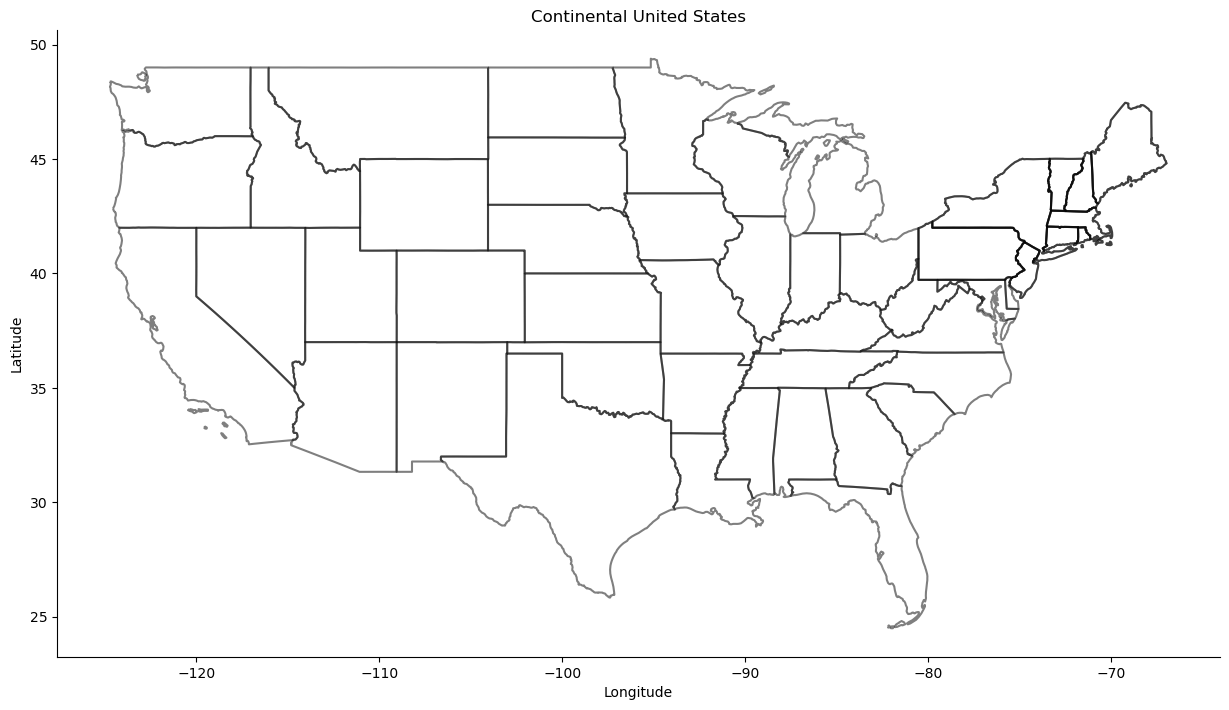

In [113]:
fig, gax = plt.subplots(figsize=(15, 10))
states.boundary.plot(ax = gax, color = 'black', alpha = 0.5)

gax.set_title('Continental United States')
gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

In [134]:
company_density = df2.groupby('state_code')['name'].count().reset_index()
company_density.columns = ['STUSPS', 'company_count']
company_density.head()

,STUSPS,company_count
0,AL,13
1,AR,28
2,AZ,160
3,CA,25031
4,CO,952


In [137]:
merged_states = states.merge(company_density, on='STUSPS', how='left')
merged_states['company_count'] = merged_states['company_count'].fillna(0)
merged_states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry,company_count
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...",25031.0
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04...",220.0
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...",460.0
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47...",635.0
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117....",112.0


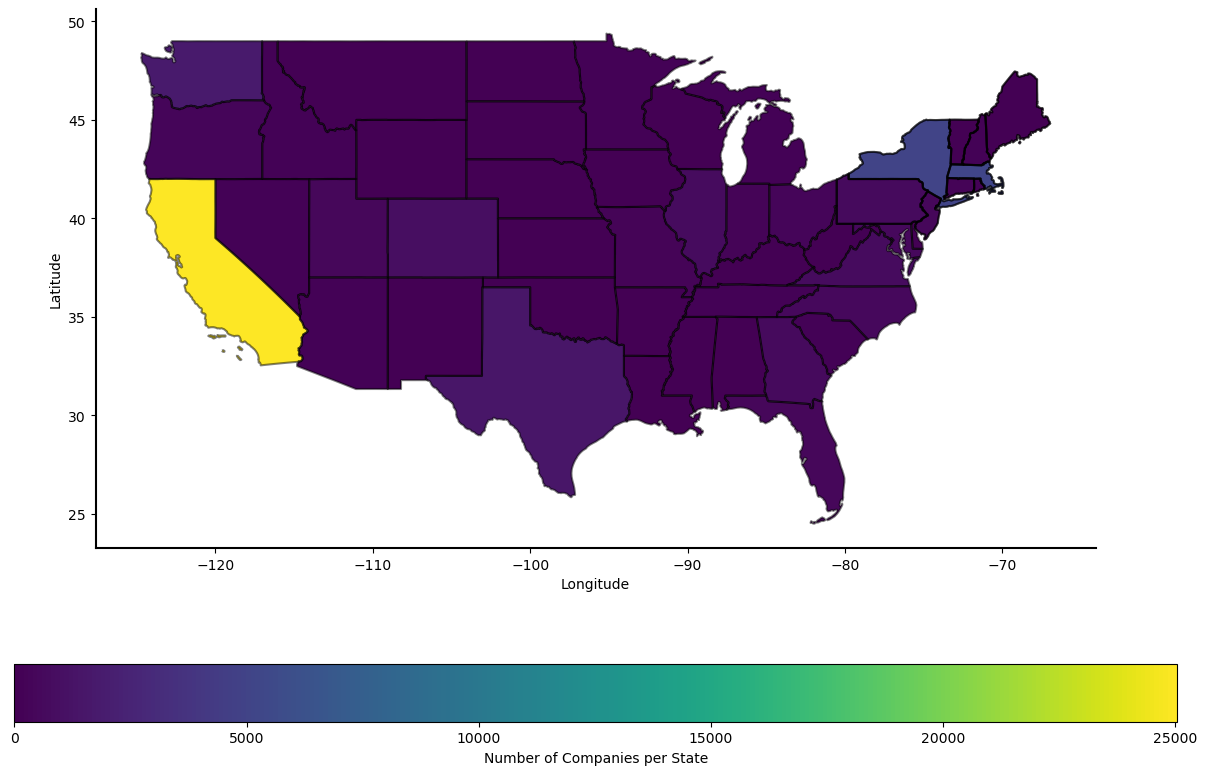

In [139]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_states.plot(column='company_count', ax=ax, legend=True, cmap='viridis',
                   legend_kwds={'label': "Number of Companies per State",
                                'orientation': "horizontal"})

states.boundary.plot(ax=ax, color='black', alpha=0.5)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

plt.show()

## Summary Statistics Tables
For this project I will proceed with option 1 dataset because it is manageable and sufficient.

In [57]:
df2.dtypes

funding_round_id              int64
funded_object_id             object
entity_type                  object
entity_id                     int64
name                         object
normalized_name              object
category_code                object
status                       object
founded_at                   object
country_code                 object
state_code                   object
city                         object
region                       object
investment_rounds             int64
invested_companies            int64
first_funding_at             object
last_funding_at              object
funding_rounds                int64
funding_total_usd           float64
first_milestone_at           object
last_milestone_at            object
milestones                    int64
relationships                 int64
funded_at                    object
funding_round_type           object
raised_amount_usd           float64
pre_money_valuation_usd     float64
post_money_valuation_usd    

In [58]:
df2['status'].value_counts()[:10]

status
operating    37474
acquired      6454
ipo           2513
closed        1390
Name: count, dtype: int64

Text(0.5, 1.0, 'Current Status of Start Ups')

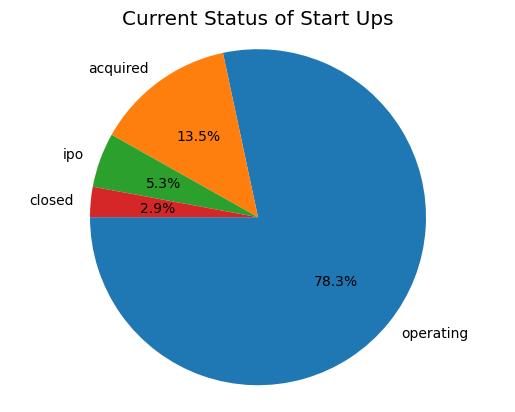

In [59]:
labels = df2['status'].value_counts().index.tolist()
pieces = df2['status'].value_counts().tolist()
plt.pie(pieces, labels = labels, autopct='%1.1f%%', startangle=180)
plt.axis('equal')
plt.title("Current Status of Start Ups", size = 'x-large')

In [60]:
df2['category_code'].value_counts()[:10]

category_code
software       6154
enterprise     5351
web            4132
mobile         3499
advertising    3489
biotech        3247
cleantech      2281
analytics      2012
ecommerce      1998
games_video    1750
Name: count, dtype: int64

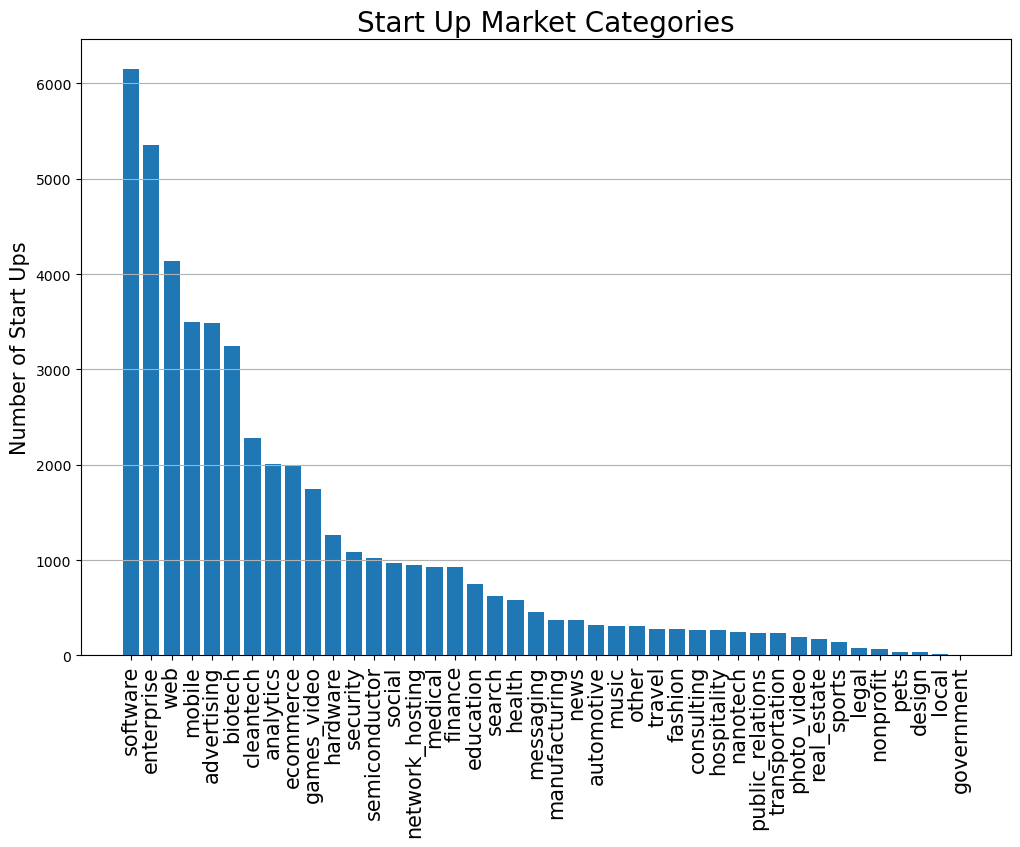

In [61]:
height = df2['category_code'].value_counts().tolist()
bars = df2['category_code'].value_counts().index.tolist()
y_pos = np.arange(len(bars))
plt.rcParams['figure.figsize'] = 12, 8
plt.bar(y_pos, height, width = 0.8)
plt.xticks(y_pos, bars, fontsize = 15, rotation=90)
plt.ylabel('Number of Start Ups', fontsize = 15)
plt.title("Start Up Market Categories", fontsize = 20)
plt.grid(axis='y')

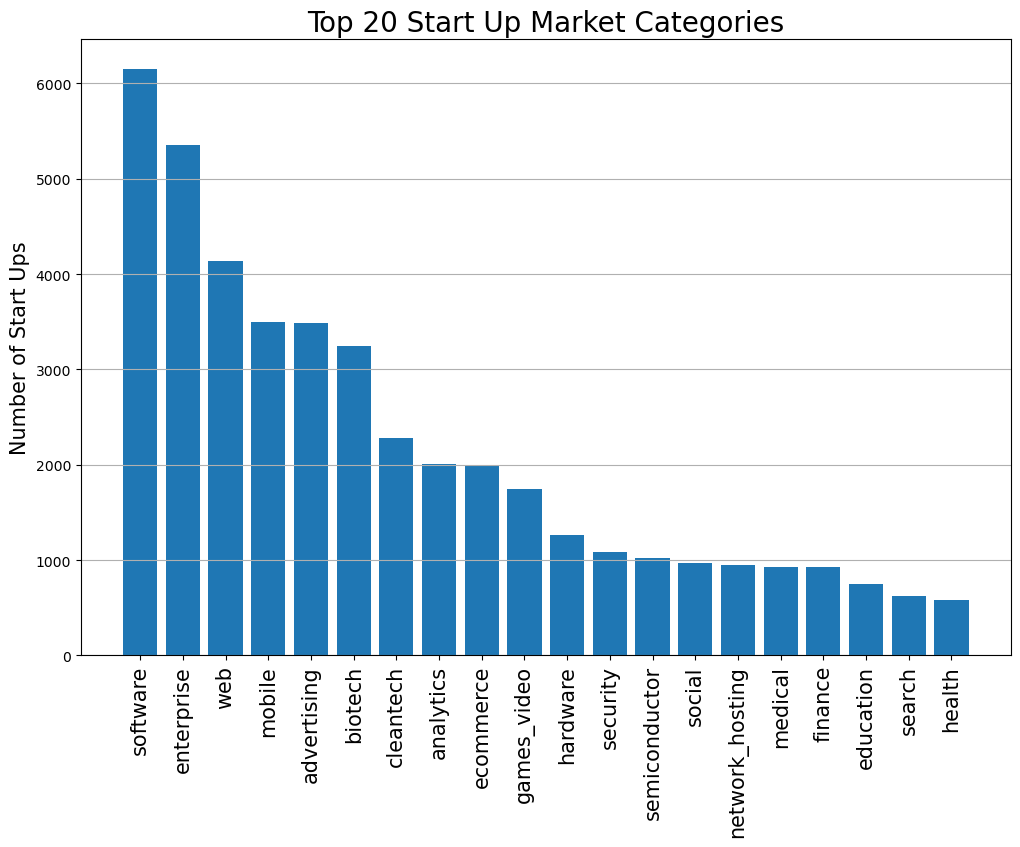

In [62]:
height = df2['category_code'].value_counts()[:20].tolist()
bars = df2['category_code'].value_counts()[:20].index.tolist()
y_pos = np.arange(len(bars))
plt.rcParams['figure.figsize'] = 12, 8
plt.bar(y_pos, height, width = 0.8)
plt.xticks(y_pos, bars, fontsize = 15, rotation=90)
plt.ylabel('Number of Start Ups', fontsize = 15)
plt.title("Top 20 Start Up Market Categories", fontsize = 20)
plt.grid(axis='y')

In [63]:
df2['region'].value_counts()[:10]

region
SF Bay           21149
New York          5061
Boston            4977
Los Angeles       2389
Seattle           1655
Washington DC     1312
San Diego          907
Austin             852
Denver             840
Chicago            687
Name: count, dtype: int64

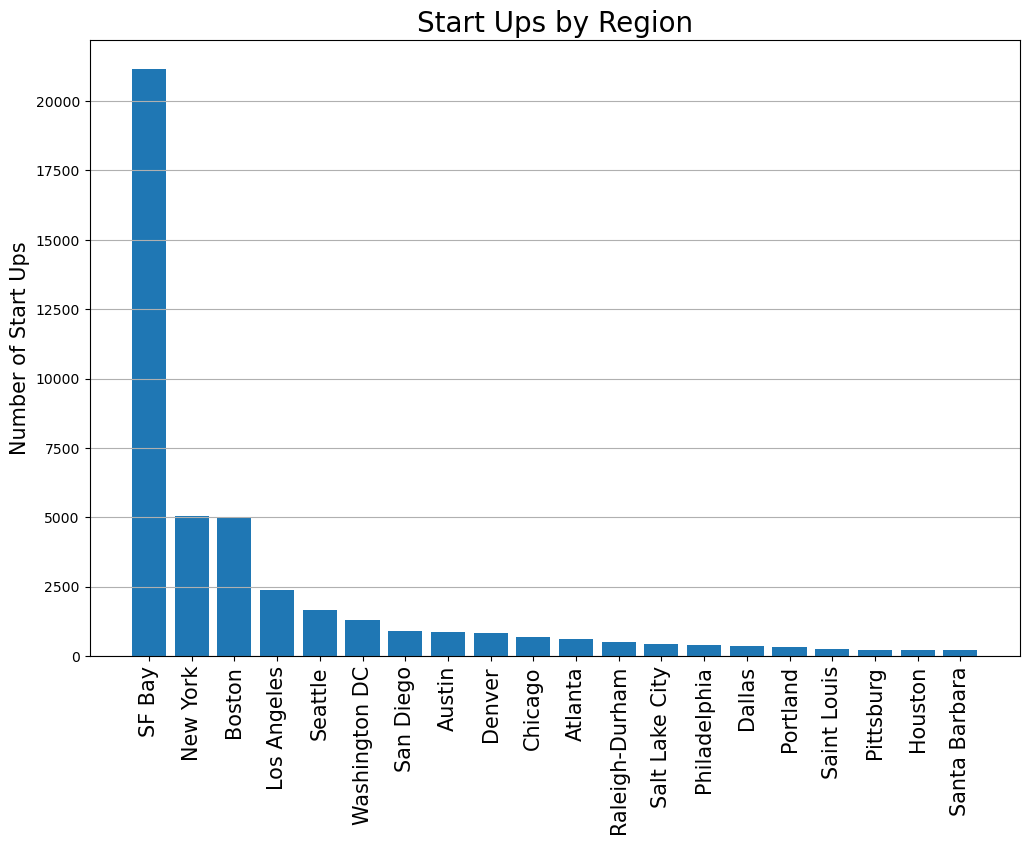

In [64]:
height = df2['region'].value_counts()[:20].tolist()
bars = df2['region'].value_counts()[:20].index.tolist()
y_pos = np.arange(len(bars))
plt.rcParams['figure.figsize'] = 12, 8
plt.bar(y_pos, height, width = 0.8)
plt.xticks(y_pos, bars, fontsize = 15, rotation=90)
plt.ylabel('Number of Start Ups', fontsize = 15)
plt.title("Start Ups by Region", fontsize = 20)
plt.grid(axis='y')

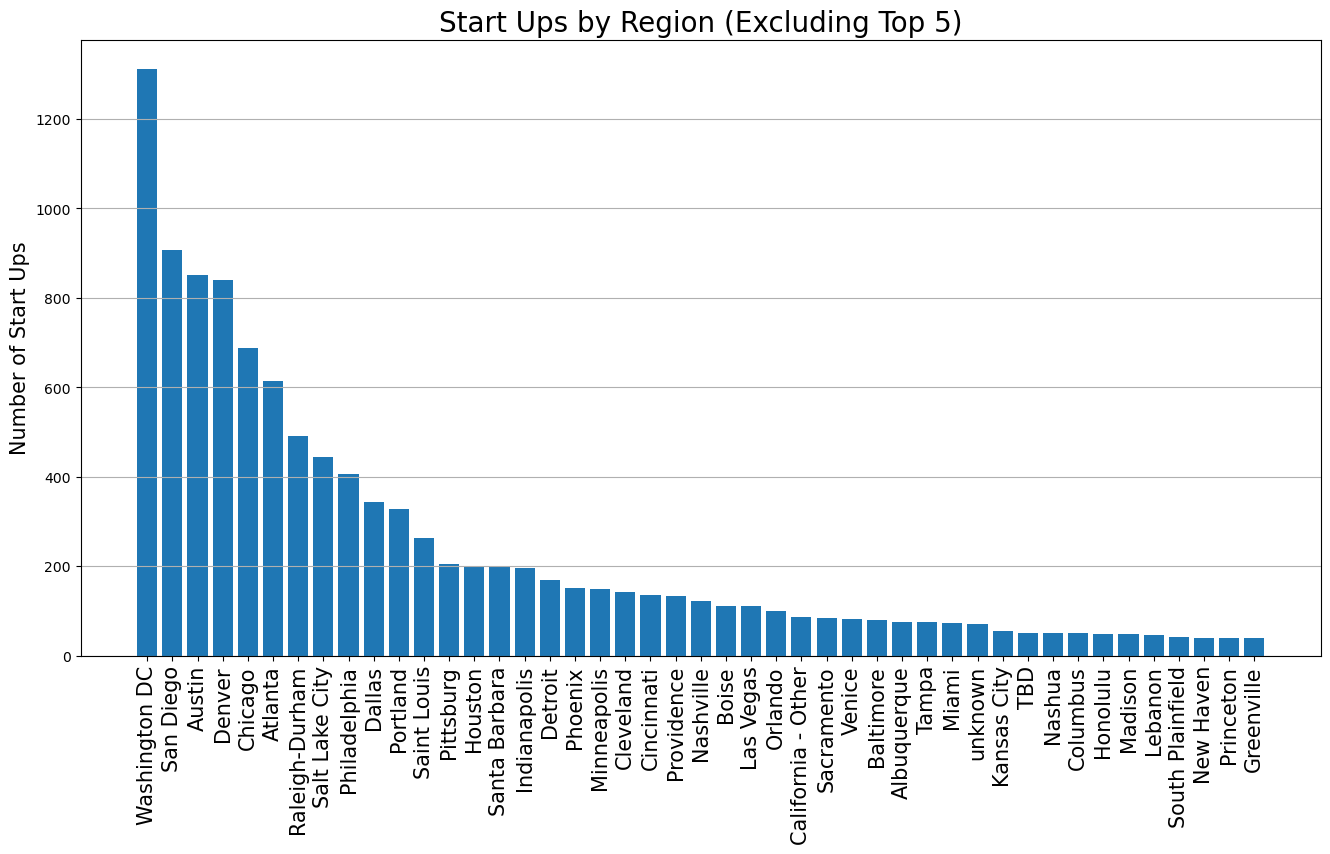

In [65]:
height = df2['region'].value_counts()[5:50].tolist()
bars = df2['region'].value_counts()[5:50].index.tolist()
y_pos = np.arange(len(bars))
plt.rcParams['figure.figsize'] = 16, 8
plt.bar(y_pos, height, width = 0.8)
plt.xticks(y_pos, bars, fontsize = 15, rotation=90)
plt.ylabel('Number of Start Ups', fontsize = 15)
plt.title("Start Ups by Region (Excluding Top 5)", fontsize = 20)
plt.grid(axis='y')

In [66]:
df2['country_code'].value_counts()[:10]

country_code
USA    47726
GBR       45
ISR       13
CAN       10
ESP        8
DEU        4
ITA        4
GRC        4
FRA        3
UMI        3
Name: count, dtype: int64

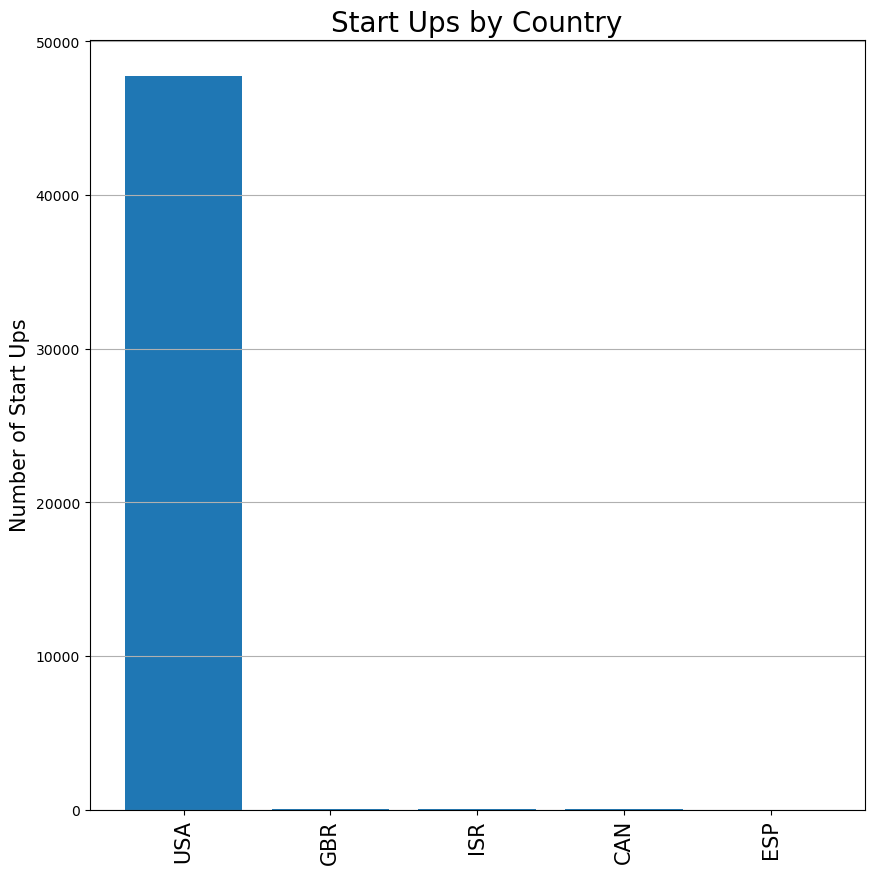

In [67]:
height = df2['country_code'].value_counts()[:5].tolist()
bars = df2['country_code'].value_counts()[:5].index.tolist()
y_pos = np.arange(len(bars))
plt.rcParams['figure.figsize'] = 10, 10
plt.bar(y_pos, height, width = 0.8)
plt.xticks(y_pos, bars, fontsize = 15, rotation=90)
plt.ylabel('Number of Start Ups', fontsize = 15)
plt.title("Start Ups by Country", fontsize = 20)
plt.grid(axis='y')

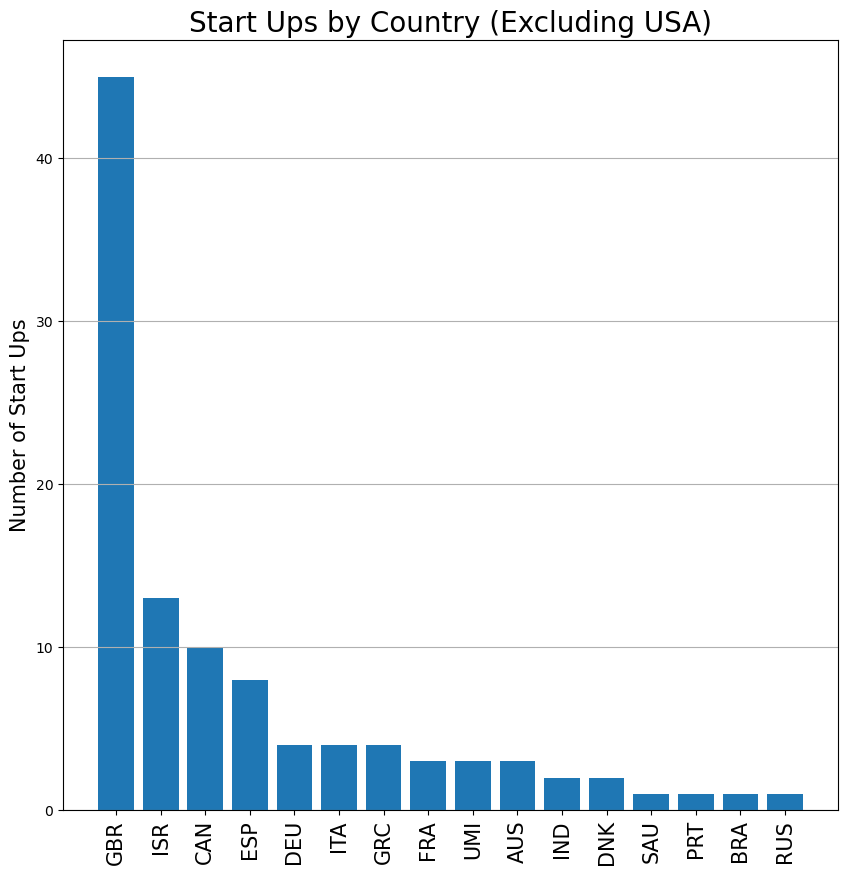

In [68]:
height = df2['country_code'].value_counts()[1:20].tolist()
bars = df2['country_code'].value_counts()[1:20].index.tolist()
y_pos = np.arange(len(bars))
plt.rcParams['figure.figsize'] = 10, 10
plt.bar(y_pos, height, width = 0.8)
plt.xticks(y_pos, bars, fontsize = 15, rotation=90)
plt.ylabel('Number of Start Ups', fontsize = 15)
plt.title("Start Ups by Country (Excluding USA)", fontsize = 20)
plt.grid(axis='y')

It appears that there is an alarmingly low amount of foreign start ups listed in this dataset, and does not accurately represent the reality. However, the US is definitely the country of start ups. This will not meaningful contribute to the analysis for this project.

In [69]:
df2['first_funding_at'].value_counts()[:10]

first_funding_at
2007-01-01    1062
2008-01-01     764
2006-01-01     676
2005-01-01     608
2006-03-01     510
2010-01-01     475
2006-11-01     438
2011-01-01     394
2004-01-01     391
2009-01-01     388
Name: count, dtype: int64

## Plots, Histograms, Figures

In [70]:
df2['funding_total_usd'].head()

0    45000000.0
1    45000000.0
2    45000000.0
3    45000000.0
8    45000000.0
Name: funding_total_usd, dtype: float64

Text(0.5, 1.0, 'Distribution of Total Funding')

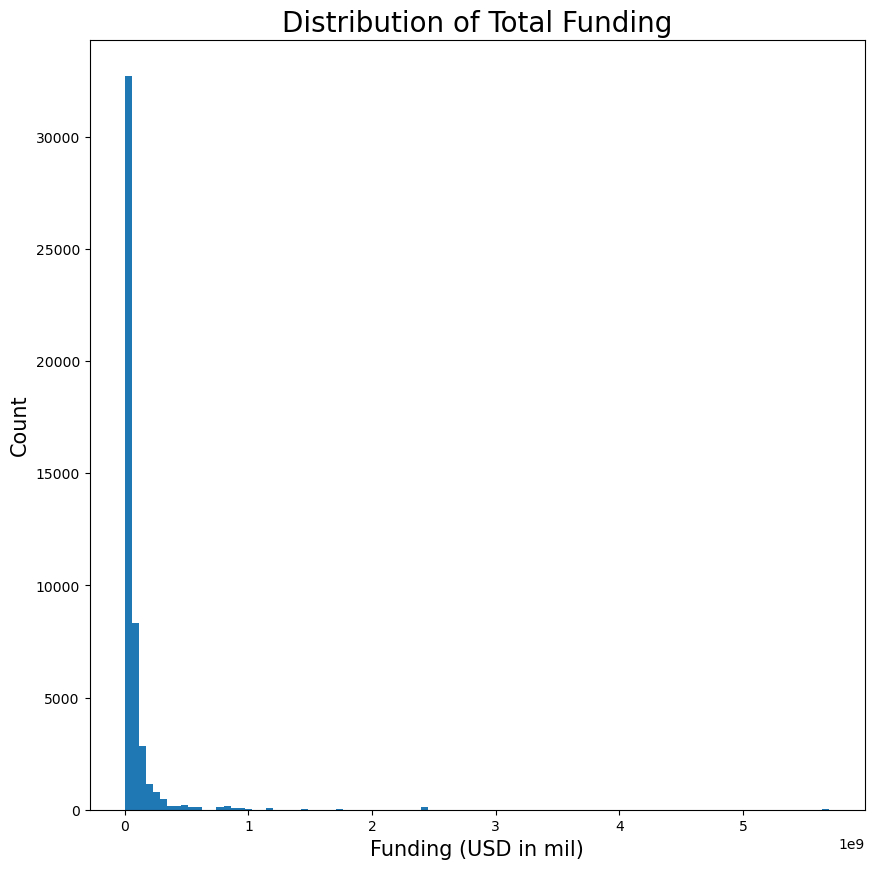

In [71]:
plt.hist(df2['funding_total_usd'].dropna(), bins=100)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Funding (USD in mil)', fontsize=15)
plt.title('Distribution of Total Funding', fontsize=20)

Text(0.5, 1.0, 'Distribution of Total Funding')

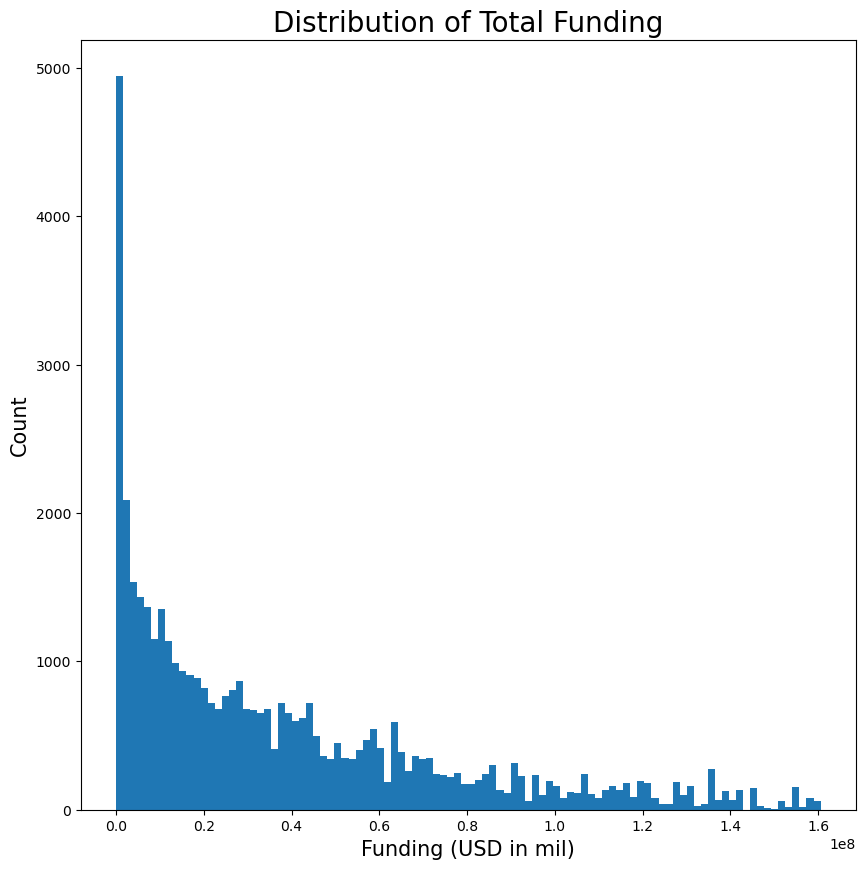

In [72]:
Q1 = df2['funding_total_usd'].quantile(0.25)
Q3 = df2['funding_total_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = (Q1 - 1.5 * IQR)
upper_bound = (Q3 + 1.5 * IQR)
remove_outlier = df2[(df2['funding_total_usd'] > lower_bound ) & (df2['funding_total_usd'] < upper_bound)]
plt.hist(remove_outlier['funding_total_usd'].dropna(), bins=100)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Funding (USD in mil)', fontsize=15)
plt.title('Distribution of Total Funding', fontsize=20)

## Conclusion

**Dataset Choices:**

Including fund dataset to see if location proximity affects investment trend patterns; no maps analysis for this project so merge that for next time. Offices dataset was omitted because exact location of company is not relevant; only considering the general location/region.